# Laboratory 2.4: Linear Regression contd.

In this practice you will extend your Linear Regression code to a more general case. Here you will need the `synthetic_dataset.csv` present in the .zip file you downloaded alongside this notebook.

In addition, we will be using the following libraries:
- Data management:
    - [numpy](https://numpy.org/)
    - [pandas](https://pandas.pydata.org/)
    - [scipy](https://scipy.org/)
- Modelling:
    - [scikit-learn](https://scikit-learn.org)
- Plotting:
    - [seaborn](https://seaborn.pydata.org/)
    - [matplotlib](https://matplotlib.org/)
    
### **All the things you need to do are marked by a "TODO" comment nearby. Make sure you *read carefully everything before working* and solve each point before submitting your solution.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import os
import sys
# Get the absolute path of the project root
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Add it to sys.path
sys.path.insert(0, project_root)

### Custom Linear Regression model

You are going to be working with the following class that you already know from the previous practice, so feel free to recycle as much code as you want (or can). In this case, you will be enhancing its functionalities, getting a more general function than the one you implemented before. 

**For now, just continue with the practice and do not fill anything, you will come back later to fill the gaps.**

In [2]:
from src.Lab_2_4_LR2 import LinearRegressor


**Data**: Remember, from the previous lab session, we had the following univariate dataset:

In [3]:
# Define data to use in this practice
x = np.array([0, 3, 2, 1, 4, 6, 7, 8, 9, 10])
y = np.array([2, 3, 2, 4, 5, 7, 9, 9, 10, 13])

Use the code *you wrote* from the previous practice (not the sklearn version) to fit the data in the following cell

In [4]:
linreg = LinearRegressor()
linreg.fit(x, y)

Before we get into the things you'll do today, let's construct a function that provides the values for the $R^2$, RMSE and MAE. For this, the inputs of this function are the true $y$ values and the predicted $\hat{y}$ values

In [5]:
from src.Lab_2_4_LR2 import evaluate_regression

In [6]:
# Obtain regression performance metrics
y_pred = linreg.predict(x)
evaluation_metrics = evaluate_regression(y, y_pred)
print(evaluation_metrics)

{'R2': 0.9201359388275276, 'RMSE': 1.0126472956832233, 'MAE': 0.8945454545454542}


## Polynomial regression

In the previous practice, you have trained a model assuming that the relationship between input and output is linear. However, in most real cases this is not common and the relationship between input and output is not linear. In this section, we are going to learn how to deal with non-linear relationships when using linear models. Read `synthetic_dataset.csv` and train a linear regression model. 

*The target variable is the last column of the dataset*

In [7]:
data = pd.read_csv("../data/synthetic_dataset.csv")

columns = data.columns
columns = columns.delete(-1)
# TODO: Obtain inputs and output from data
X = np.array(data[columns])
y = np.array(data["Output"])

In this case we will skip the preprocessing and go straight to the modelling phase. Therefore, fit the model here.

In [8]:
# TODO: Train linear regression model
linreg_mult = LinearRegressor()
linreg_mult.fit(X, y)

In [9]:
# TODO: Obtain and print the regression performance metrics
y_pred = linreg_mult.predict(X)
evaluation_metrics = evaluate_regression(y, y_pred)
print(evaluation_metrics)

{'R2': 0.5452814241832913, 'RMSE': 3.1936452748702813, 'MAE': 2.237394521024784}


If you trained the model well, the $R^2$ metric will be terrible, in the order of $0.5$. **What happened here?** Let's try to clear this via the *study of the residuals*.

Create a function to plot the residuals of the model. This function shall:
- Create a **histogram** of the residuals.
- Create a **Q-Q plot** of the residuals.
- Create a **scatterplot of the residuals against each input variable, the true output variable and the predictions**.

**Why do we want to check the residuals this way?** 

> Es necesario estudiar los residuos de esta manera para comprobar que el modelo es preciso y que sus predicciones son lo mejor posible. 
> * Histograma: se comprueba si los residuos siguen una distribución normal, algo que se asume con determinados modelos.
> * Q-Q plot: también verifican si los residuos son normales comparandolos con una recta que representa una distribución normal.
> * Scatterplot: se utiliza para detectar si hay patrones o alguna relación entre los residuos y otras variables.

In [10]:
def plot_residuals(data, output_column, prediction_column):
    """
    Plot residuals of a model against all variables in the DataFrame, using box plots for
    categorical variables and scatter plots for continuous variables. Additionally, plot
    a histogram and a QQ-plot of the residuals.

    Args:
        data (pd.DataFrame): The DataFrame containing the data.
        output_column (str): The name of the output column.
        prediction_column (str): The name of the prediction column.
    """
    # TODO: Calculate residuals
    y_true = np.array(data[output_column])
    y_pred = np.array(data[prediction_column])
    residuals = y_true-y_pred 
    
    num_features = len(data.columns) - 2  # Exclude output and prediction columns

    # Determine the number of rows and columns for subplots
    num_rows = int(np.ceil(np.sqrt(num_features + 4)))  # Add 4 for histogram, Q-Q plot, true output vs residuals, and predictions vs residuals
    num_cols = int(np.ceil((num_features + 4) / num_rows))

    # Plot histogram of residuals
    plt.figure(figsize=(5 * num_cols, 4 * num_rows))
    plt.subplot(num_rows, num_cols, 1)
    plt.hist(residuals, bins=30, color='orange')
    plt.title('Histogram of Residuals')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')

    # TODO: Plot Q-Q plot of residuals (tip: use stats.probplot from scipy)
    plt.subplot(num_rows, num_cols, 2)
    stats.probplot(residuals, dist="norm", plot=plt)       # Fill the code here
    plt.title('Q-Q Plot of Residuals')

    # TODO: Plot residuals against output variable
    plt.subplot(num_rows, num_cols, 3)
    plt.scatter(y, residuals, alpha=0.5, color="orange")     # Fill the code here
    plt.title('Residuals vs True Output')
    plt.xlabel('True Output')
    plt.ylabel('Residuals')

    # Plot residuals against prediction variable
    plt.subplot(num_rows, num_cols, 4)
    plt.scatter(data[prediction_column], residuals, alpha=0.5, color="orange")   # Use this as example for later
    plt.title('Residuals vs Predictions')
    plt.xlabel('Predictions')
    plt.ylabel('Residuals')

    # TODO: Plot residuals against each input variable
    for i, col in enumerate(data.columns):
        if col not in [output_column, prediction_column]:
            plt.subplot(num_rows, num_cols, i + 5)
            plt.scatter(data[col], residuals, alpha=0.5, color="orange")   # Fill the code here
            plt.title(f'Residuals vs {col}')
            plt.xlabel(col)
            plt.ylabel('Residuals')

    plt.tight_layout()
    plt.show()

Now, **print the coefficients** of the model **alongside the plots** you can generate with the previous function

Coefficients of the model: [-1.91180984e-03 -5.98029466e-03  1.63032400e+00  3.05930873e+00]


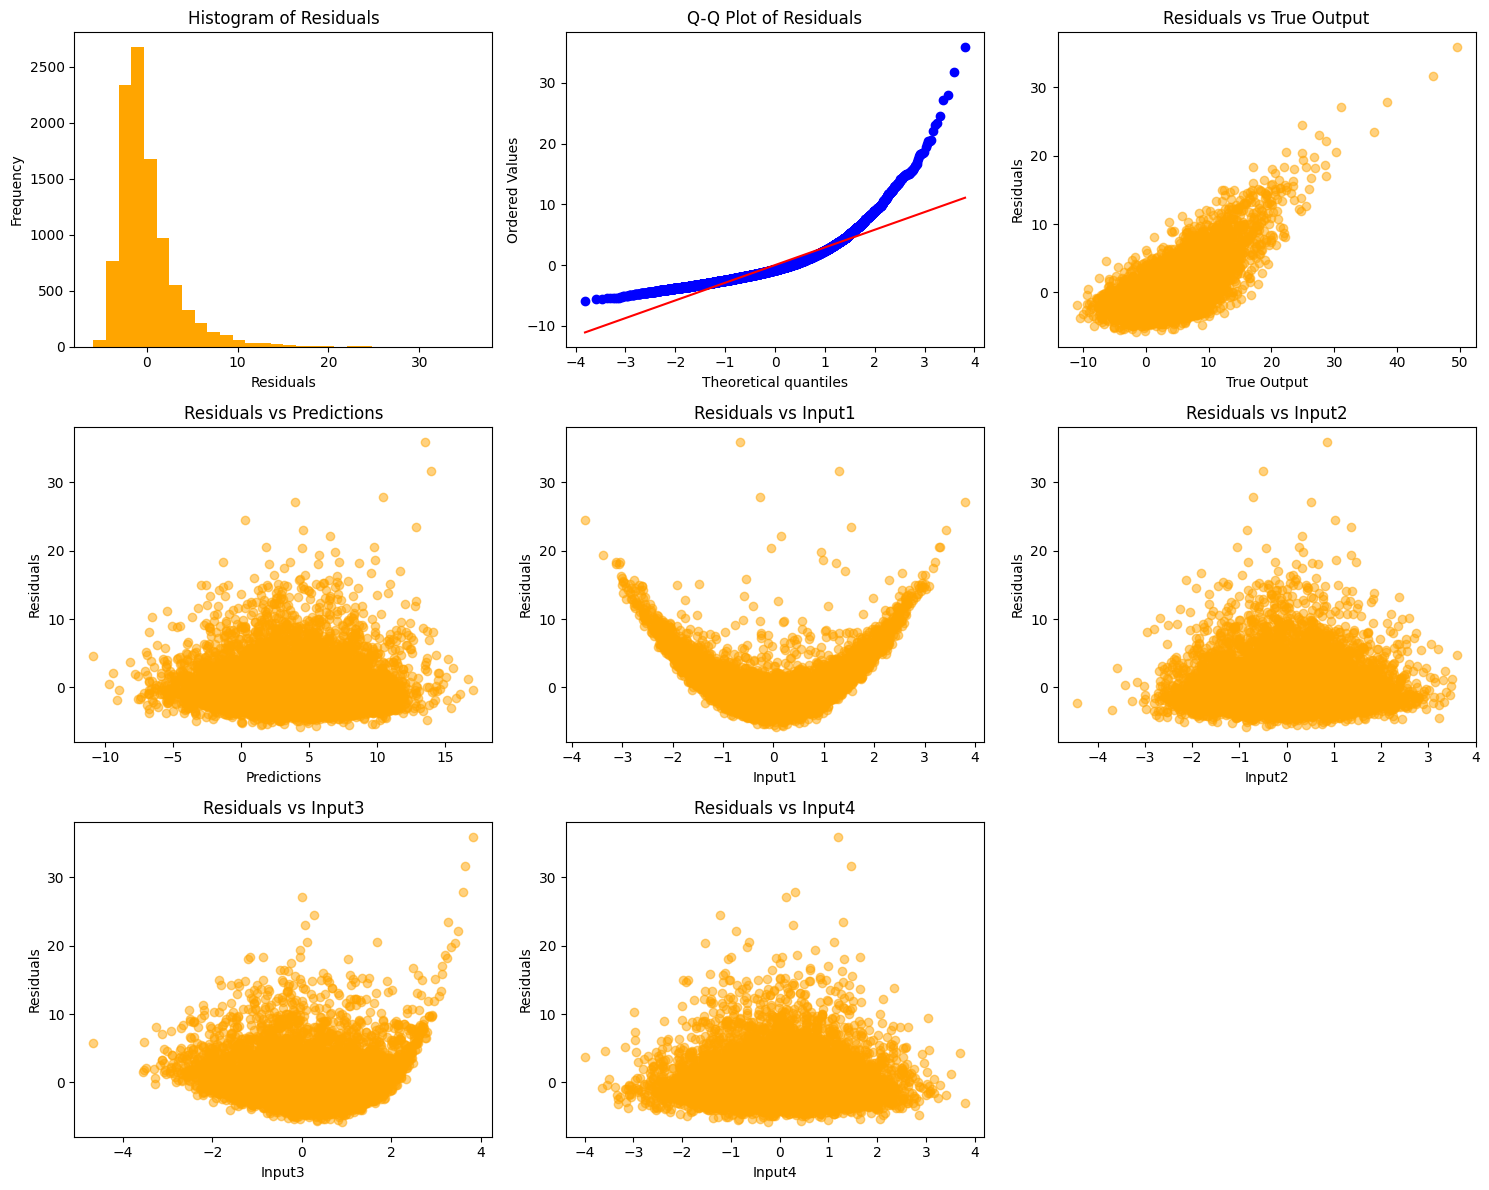

In [11]:
# TODO:  First, construct a dictionary of the coefficients to print them
coef_dict = linreg_mult.coefficients
print(f"Coefficients of the model: {coef_dict}")

# Plot the residuals for the predictions
data["Predictions"] = linreg_mult.predict(X)
plot_residuals(data, 'Output', 'Predictions')

**What are we seeing here? Is there any way to improve the model?**
> Lo que estamos viendo:
> * Histograma: La distribución no normal, es asimétrica con una cola grande hacia la derecha. Esto refleja que el modelo no captura de manera correcta la variabilidad de los datos y no es capaz de predicir de manera precisa el valor objetivo.
> * QQ plot: Los puntos se desvían de la línea que representa una normal, sobre todo en los extremos. Los residuos no siguen una distribución normal.
> * En cuanto a los scatter plots, representan que los residuos son heterocedásticos, es decir, que no tienen varianza constante. Además, en algunos scatter plots se observa que no se captura de forma correcta la relación entre las variables.

> Para mejorar el modelo:
> * Se podrían aplicar determinadas transformaciones como Box-Cox para estabilizar la varianza.
> * Se puede probarcon modelos que no sean lineales, siendo estos más flexibles.
> * Se pueden buscar outliers que estén influyendo en el comportamientodel modelo.

As you may expect, you should see some higher-order contribution to the behavior of the data, since some of the residuals have clear structures. In particular, `Input1` has a higher-order polynomial contribution (*which order do you think?*), while `Input2` has an *exponential* form. 

In order to fit a regression model with these contributions, construct a new dataframe where each column corresponds to the desired manipulation of each variable. Then, fit the regression model and see the results.

* Also, pay attention to the fact that you can use whatever contribution you see fit here, not just these previous ones.

In [12]:
# TODO
input1 = np.array(data["Input1"])
input3 = np.array(data["Input3"])
input4 = np.array(data["Input4"])
output = np.array(data["Output"])
data_transf = pd.DataFrame({'Input1': input1 ** 2,   # Substitute "None" by the degree you think works here
                            'Input2': np.exp(input3),
                            'Input3': input4,
                            'Output': output})
X_transf = data_transf.iloc[:,:3].values

# Train linear regression model
linreg = LinearRegressor()
linreg.fit(X_transf, y)

# Evaluate the metrics to see the behavior
y_pred = linreg.predict(X_transf)
evaluation_metrics = evaluate_regression(y, y_pred)
print(evaluation_metrics)

{'R2': 0.9557524745534756, 'RMSE': 0.9962304737909358, 'MAE': 0.7956340344398112}


Now, print again the coefficients for the model and plot the residuals as you did before.

**What do you observe?**
> En este caso al eliminar el segundo input y volver a calcular las métricas, se observa que el r^2 el ahora 0.95 lo que significa que se explican el 95% de los datos. Además, tanto en el histograma como en el QQ plot, se ve que ahora la disribución sí que es normal centrada en el 0. En lugar de tener patrones definidos como los mostrados en los gráficos anteriores, en este caso los puntos están distribuidos en nubes de puntos, que es lo que se buscaba desde un principio.

Coefficients of the model: {'Input1': 1.9985407741302754, 'Input2': 0.9951259300218532, 'Input3': 2.9880699293625486}


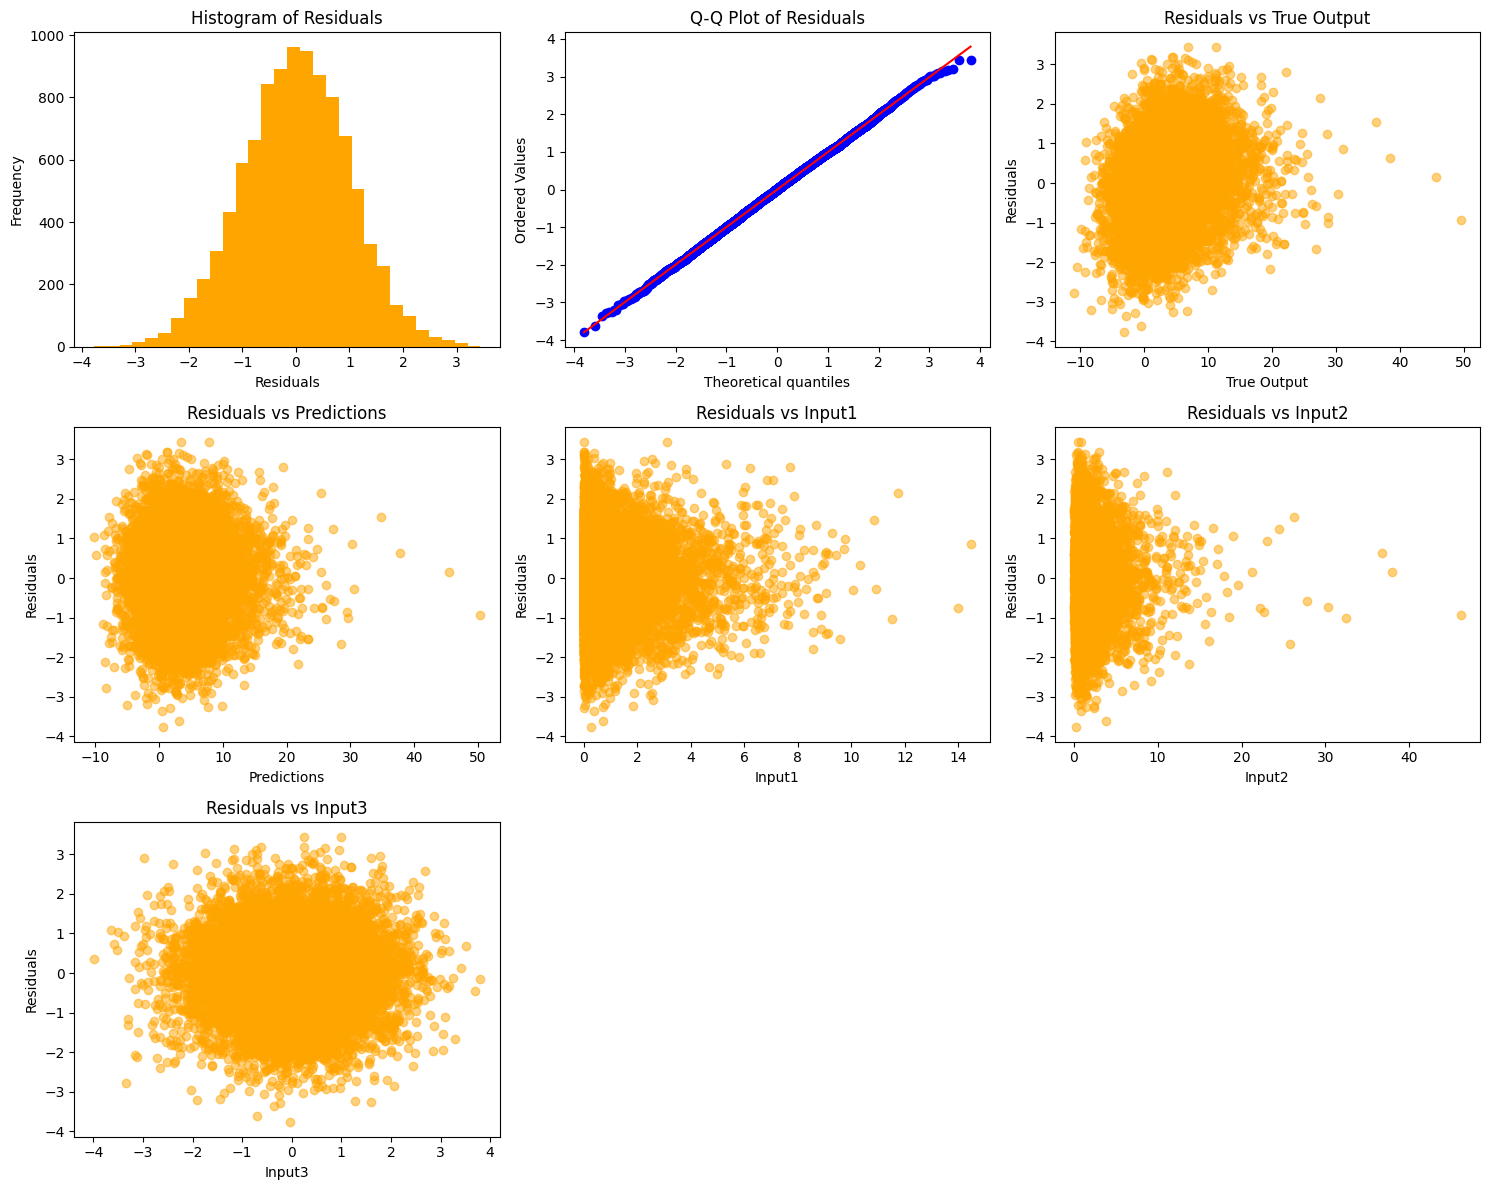

In [13]:
coef_dict = {'Input' + str(i+1): coef for i, coef in enumerate(linreg.coefficients)}
print(f"Coefficients of the model: {coef_dict}")
data_transf["Predictions"] = linreg.predict(X_transf)
plot_residuals(data_transf, 'Output', 'Predictions')

## Categorical variables

Linear regression, as is, can not deal with categorical variables. Therefore, we need to encode the variables when preprocessing the data. Complete the one-hot-encode function below. Take into account that strings shall be treated automatically as categorical variables.
<center>

![Image](https://miro.medium.com/v2/resize:fit:1358/1*ggtP4a5YaRx6l09KQaYOnw.png)

</center>

In [14]:
from src.Lab_2_4_LR2 import one_hot_encode

We will use this in a usual dataset from the internet. If everything is well, you should be able to run the following code as-is.

In [15]:
# Load the dataset
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
data = pd.read_csv(url)


y = data['charges'].values
X = data.drop(columns=['charges']).values

# Preprocess the data
# Identify categorical columns for one-hot encoding
categorical_columns = [data.columns.get_loc(col) for col in ['sex', 'smoker', 'region']]

# One-hot encode categorical variables
X_encoded = one_hot_encode(X, categorical_columns, drop_first=True)
X_encoded = X_encoded.astype(float)                                  # Watch out for this!

# Instantiate and fit the LinearRegressor
model = LinearRegressor()
model.fit(X_encoded, y)

# Predict and evaluate
y_pred = model.predict(X_encoded)
evaluation_metrics = evaluate_regression(y, y_pred)
print(evaluation_metrics)

{'R2': 0.7509130345985207, 'RMSE': 6041.6796511744515, 'MAE': 4170.8868941636}


Compare yourself with scikit

In [16]:
from sklearn.linear_model import LinearRegression

# Load the dataset
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
data = pd.read_csv(url)

# Preprocess the data
# TODO: One-hot encode categorical variables. Use pd.get_dummies()
data_encoded = pd.get_dummies(data) 

# Split the data into features (X) and target (y)
X = data_encoded.drop('charges', axis=1)
y = data_encoded['charges']

# Instantiate the LinearRegression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X, y)

# Make predictions on the test data
y_pred = model.predict(X)

# Evaluate the model
evaluation_metrics = evaluate_regression(y, y_pred)
print(evaluation_metrics)


{'R2': 0.7509130345985207, 'RMSE': 6041.6796511744515, 'MAE': 4170.886894163586}


### Colored residuals

Now that we have categorical variables, the relationship between inputs and outputs might differ for different levels of the categorical variables. Therefore, you will modify the `plot_residuals` function to **color the scatter plots based on the value of a specific categorical variable**.

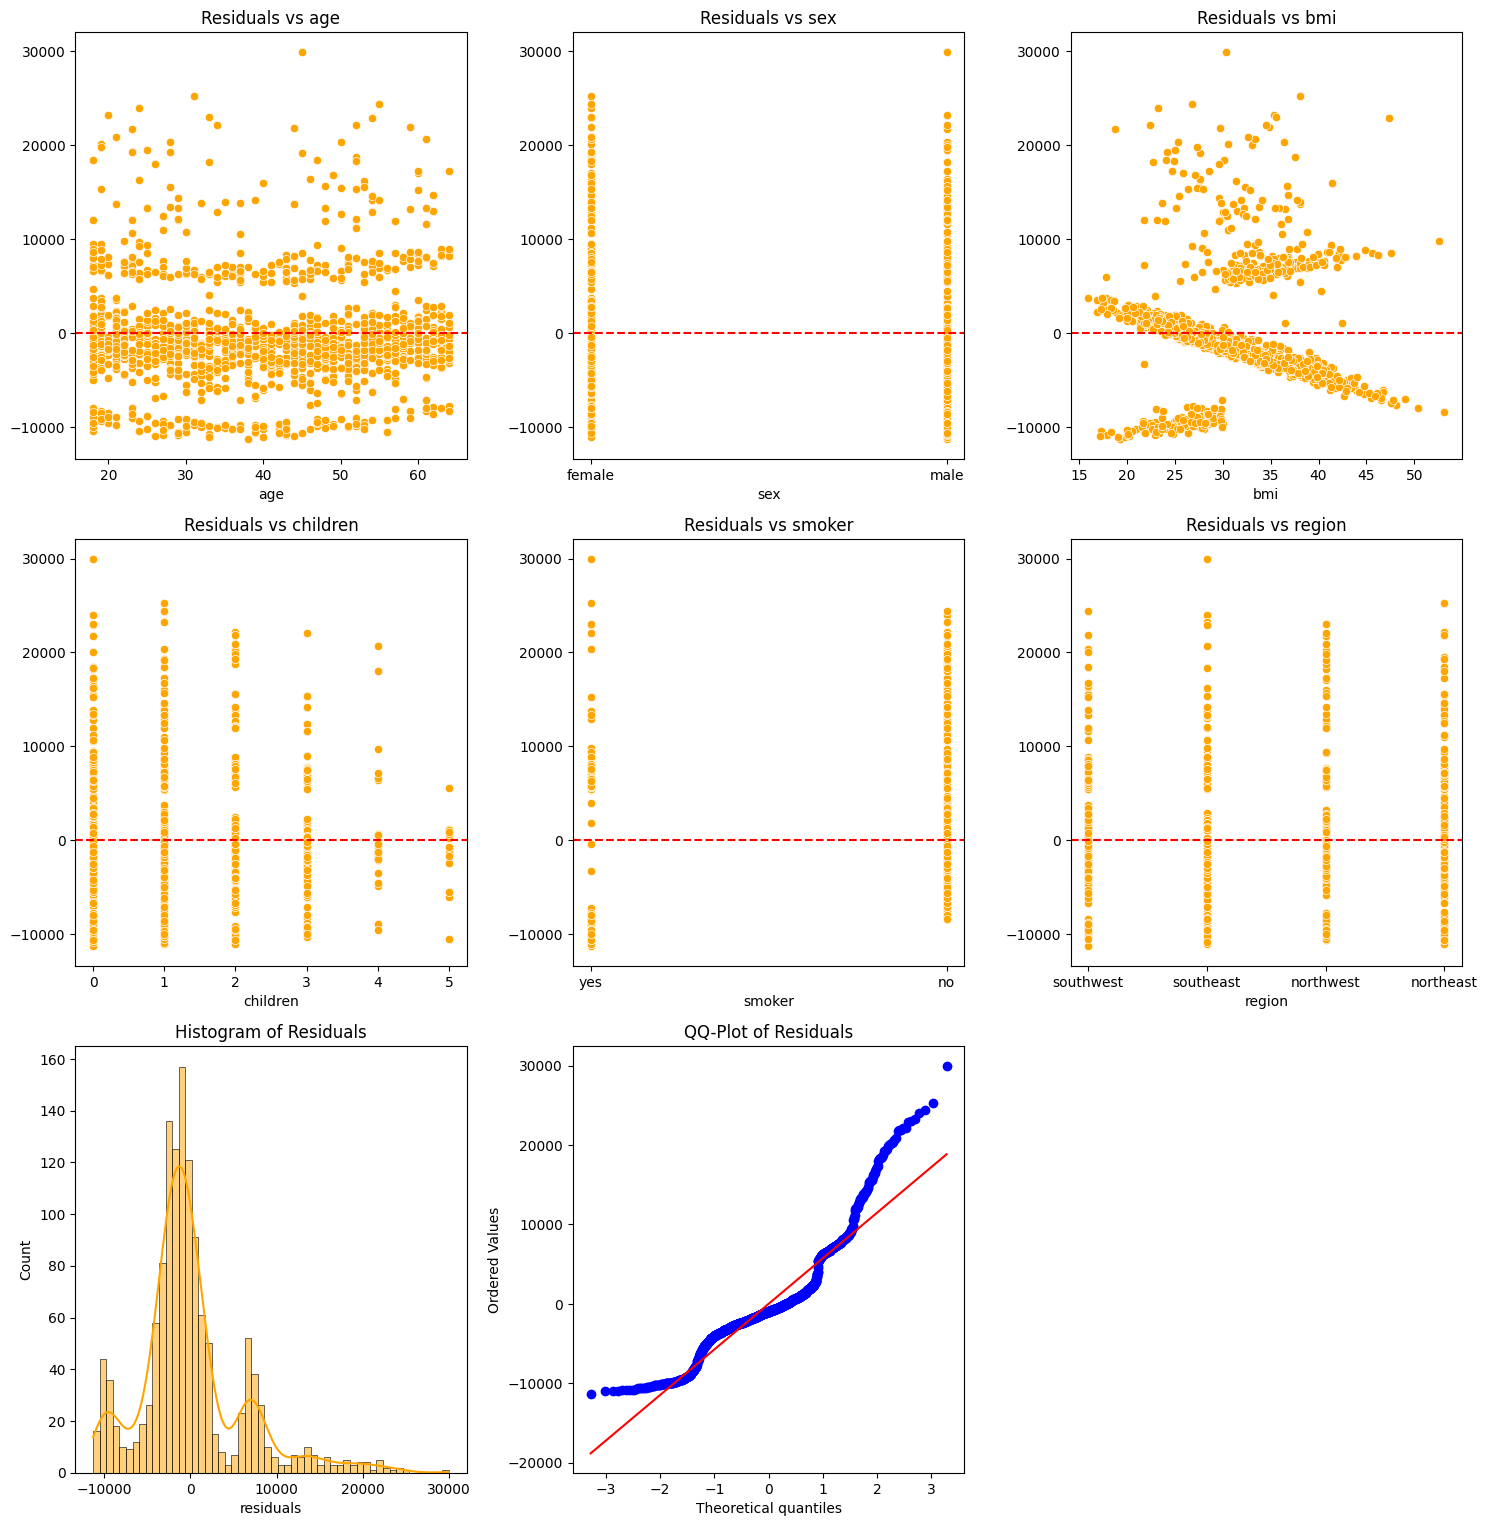

In [17]:
def plot_residuals_1(data, output_column, prediction_column, categorical_var=None):
    """
    Plot residuals of a model against all variables in the DataFrame. Additionally, plot
    a histogram and a QQ-plot of the residuals.

    Args:
        data (pd.DataFrame): The DataFrame containing the data.
        output_column (str): The name of the output column.
        prediction_column (str): The name of the prediction column.
        categorical_var (str, optional): The name of a categorical variable for coloring. Defaults to None.
    """
    # TODO: As before, calculate residuals
    y = np.array(data[output_column])
    y_pred = np.array(data[prediction_column])
    residuals = y-y_pred
    data['residuals'] = residuals 

    # Identify columns to plot (excluding the output and prediction columns)
    columns_to_plot = [col for col in data.columns if col not in [output_column, prediction_column, 'residuals']]

    # Number of rows and columns for the subplot
    n_cols = 3
    n_rows = int(len(columns_to_plot) / n_cols) + 2  # Additional row for histogram and QQ-plot

    # Create subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 5))

    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    # TODO: Plot each variable against the residuals
    for i, col in enumerate(columns_to_plot):
        ax = axes[i]
        
        if col == categorical_var and categorical_var in data.columns:
            sns.scatterplot(x = data[categorical_var], y = residuals, data=data, ax=ax, color = "orange")
        else:
            sns.scatterplot(x = data[col], y = residuals, data=data, ax=ax, color="orange")
        
        ax.set_title(f'Residuals vs {col}')
        ax.axhline(0, ls='--', color='r')

    # Histogram of residuals
    sns.histplot(data['residuals'], kde=True, ax=axes[i + 1], color="orange")
    axes[i + 1].set_title('Histogram of Residuals')

    # QQ-plot of residuals
    stats.probplot(data['residuals'], dist="norm", plot=axes[i + 2])
    axes[i + 2].set_title('QQ-Plot of Residuals')

    # Hide any unused axes
    for j in range(i + 3, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

data['predictions'] = model.predict(X)
# Example usage
plot_residuals_1(data, 'charges', 'predictions', 'smoker')


**What's happening with the residuals?**
> **What's happening with the residuals?**
> En el análisis de los residuos de cada unos de los gráficos las conclusiones obtenidas son las siguientes:

> * Residuos vs edad: esta variable es discreta ya que no se puede, por ejemplo, tener 10,5 años sino que se tienen o 10 u 11 pero no se pueden tener decimales en la edad. Se observa que el grueso de los residuos se encuentran en torno al 0 y que hay dos bloques más delgados tanto por encima como por debajo del principal. Esto significa que las predicciones del modelo son bastante cercanas a los valores reales.

> * Residuos vs sexo: al ser una variable categórica se muestran solo dos columnas a los lados del gráfico que representan mujeres y hombres. Se puede observar que tanto para uno como para el otro los residuos están distribuidos más o menos de la misma manera.

> * Residuos vs bmi: se puede observar que se da el fenómeno de la paradoja de Simpson para los dos bloques que son paralelos. Sin embargo, hay un bloque de puntos princial que tiene una pendiente negativa y que divide los otros dos bloques de puntos. Aunque también es cierto que se pueden encontrar algunos datos que se encuentran muy alejados de los principales grupos.

> * Residuos vs # de niños: de igual manera que la edad, el número de hijos es una variable discreta (no se puede tener 2,5 hijos). Se observa que a medida que crece el número de hijos el número de puntos disminuye. Esto es debido a que no es común tener muchos hijos por lo tanto no hay demasiados datos que analizar.

> * Residuos vs fumador: igual que en la gráfia del sexo, el ser fumador o no es una variable categórica por lo que de nuevo se encuentran dos columnas a los lados de la gráfica. En este caso se observan más datos para aquellos que no son fumadores aunque la varianza de los fumadores es mayor.

> * Residuos vs región: es una variable categórica con 4 valores posibles cuyos residuos están más o menos igualmente distribuidos para todos los valores.

> * Histograma y QQ plot: rn el histograma se observa un gran número de puntos alrededor del 0 y dos bloques más pequeños cercanos al 10000 y -10000, es una distribución trimodal. Esto mismo se puede observar en el QQ-plot, que muestra si la distribución se asemeja a una normal que en este caso no se podría considerar. 

# _Rolling in the deep_

Following the theory taught in class, do the following:

1. **implement the gradient descent algorithm** to train the linear regression model and reproduce the results using this training method. You can find the structure for the gradient descent inside the initial linear regression function, inside the method `fit_gradient_descent`.
2. As final steps, **display the progress of the loss function by plotting the gradient descent steps on the X-axis and the loss function on the Y-axis for each step**. 
3. Additionally, **using the same representation as in the previous section where each axis represents the values of w and b, show the sequence of steps that bring you closer to the optimum each time**. Each step should be a point in space, with coordinates (w,b). Compare all the results with the optimal solution from the scikit fit coefficients.

Feel free to add as many cells as you may need from here onwards in order to fulfill these three tasks

In [18]:
data = pd.read_csv("../data/synthetic_dataset.csv")
columns = data.columns
columns = columns.delete(-1)
# TODO: Obtain inputs and output from data
X = np.array(data[columns])
y = np.array(data["Output"])

Epoch 0: MSE = 35.13312420498392
Epoch 10: MSE = 30.573573070990125
Epoch 20: MSE = 26.848275454187522
Epoch 30: MSE = 23.80450549768377
Epoch 40: MSE = 21.317511854545415
Epoch 50: MSE = 19.285390910796146
Epoch 60: MSE = 17.62490006682477
Epoch 70: MSE = 16.26803861655894
Epoch 80: MSE = 15.159255419032567
Epoch 90: MSE = 14.253168398997433
Epoch 100: MSE = 13.51270201008428
Epoch 110: MSE = 12.907566017452828
Epoch 120: MSE = 12.413013018401923
Epoch 130: MSE = 12.008823599794978
Epoch 140: MSE = 11.678477404426312
Epoch 150: MSE = 11.408476031544438
Epoch 160: MSE = 11.187789945504761
Epoch 170: MSE = 11.00740666877012
Epoch 180: MSE = 10.85996170167956
Epoch 190: MSE = 10.739437013374966
Epoch 200: MSE = 10.640914726271292
Epoch 210: MSE = 10.560375884984214
Epoch 220: MSE = 10.494536053170235
Epoch 230: MSE = 10.440710994609205
Epoch 240: MSE = 10.396706930378082
Epoch 250: MSE = 10.36073087300219
Epoch 260: MSE = 10.331317362563729
Epoch 270: MSE = 10.307268602812616
Epoch 280: 

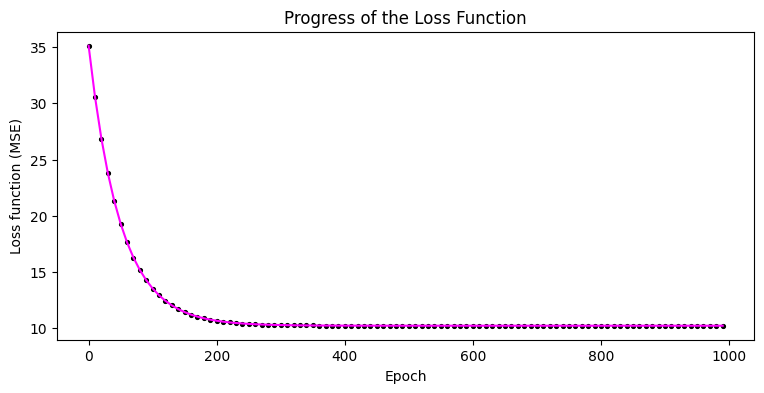

In [19]:
linreg_gradient = LinearRegressor()
linreg_gradient.fit(X, y, "gradient_descent")

In [20]:
y_pred_g = linreg_gradient.predict(X)
evaluation_metrics = evaluate_regression(y, y_pred_g)
print(evaluation_metrics)

{'R2': 0.5452814220101152, 'RMSE': 3.193645282501764, 'MAE': 2.237349329546097}


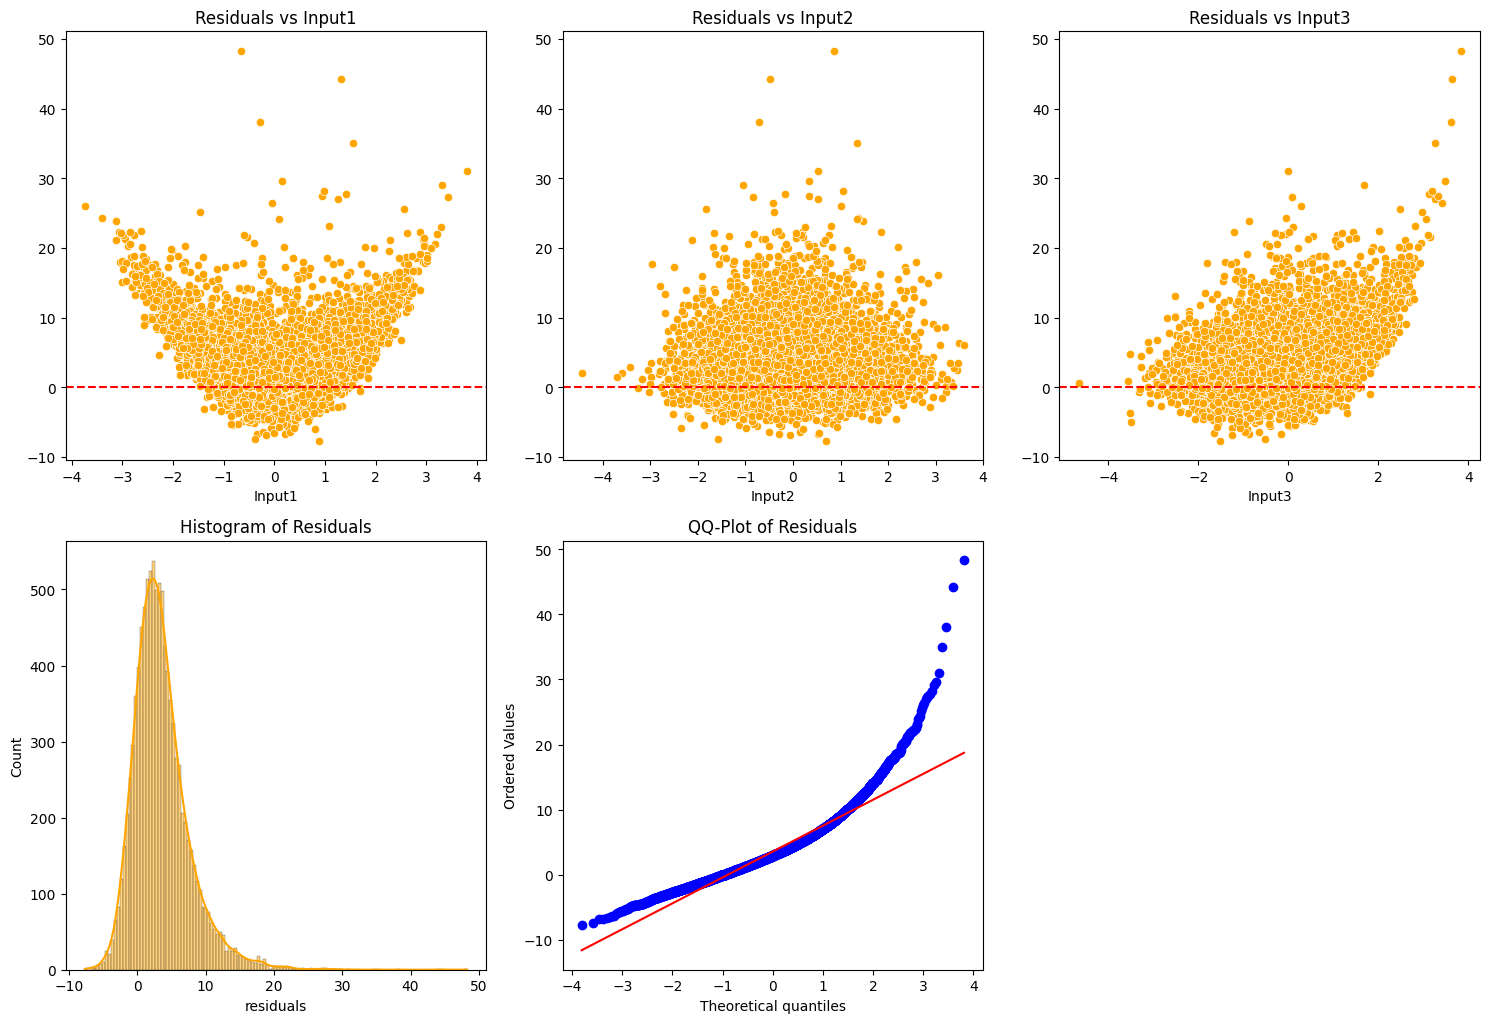

In [21]:
#REPRESENTACIÓN DE LOS RESIDUOS CON RESPECTO A CADA VARIABLE
contador = len(columns)-1
for column in columns:
    if contador == 0:
        plot_residuals_1(data, "Output", column)
    else:
        contador -= 1

In [22]:
from sklearn.linear_model import LinearRegression

# Split the data into features (X) and target (y)
X = data.drop('Output', axis=1)
y = data['Output']

# Instantiate the LinearRegression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X, y)

#Optimal for scikit
w = model.coef_[0]
b = model.intercept_

# Make predictions on the test data
y_pred = model.predict(X)

# Evaluate the model
evaluation_metrics = evaluate_regression(y, y_pred)
print(evaluation_metrics)

{'R2': 1.0, 'RMSE': 5.485597492589866e-15, 'MAE': 4.158396706404472e-15}


Epoch 0: MSE = 52.88843057469622
Epoch 10: MSE = 1.3455500680035357
Epoch 20: MSE = 1.3217229282683258
Epoch 30: MSE = 1.3044592637019057
Epoch 40: MSE = 1.288202078891646
Epoch 50: MSE = 1.2728921758158547
Epoch 60: MSE = 1.258474357735593
Epoch 70: MSE = 1.2448966442016447
Epoch 80: MSE = 1.2321100835872931
Epoch 90: MSE = 1.2200685766033883
Epoch 100: MSE = 1.2087287100969348
Epoch 110: MSE = 1.1980496005339818
Epoch 120: MSE = 1.1879927466025308
Epoch 130: MSE = 1.1785218904040515
Epoch 140: MSE = 1.1696028867331538
Epoch 150: MSE = 1.1612035799741467
Epoch 160: MSE = 1.1532936881706375
Epoch 170: MSE = 1.1458446938502267
Epoch 180: MSE = 1.1388297412106871
Epoch 190: MSE = 1.1322235392969393
Epoch 200: MSE = 1.1260022708197703
Epoch 210: MSE = 1.1201435062875398
Epoch 220: MSE = 1.1146261231413077
Epoch 230: MSE = 1.1094302296018315
Epoch 240: MSE = 1.1045370929538887
Epoch 250: MSE = 1.0999290720093609
Epoch 260: MSE = 1.0955895535055948
Epoch 270: MSE = 1.0915028922097316
Epoch 

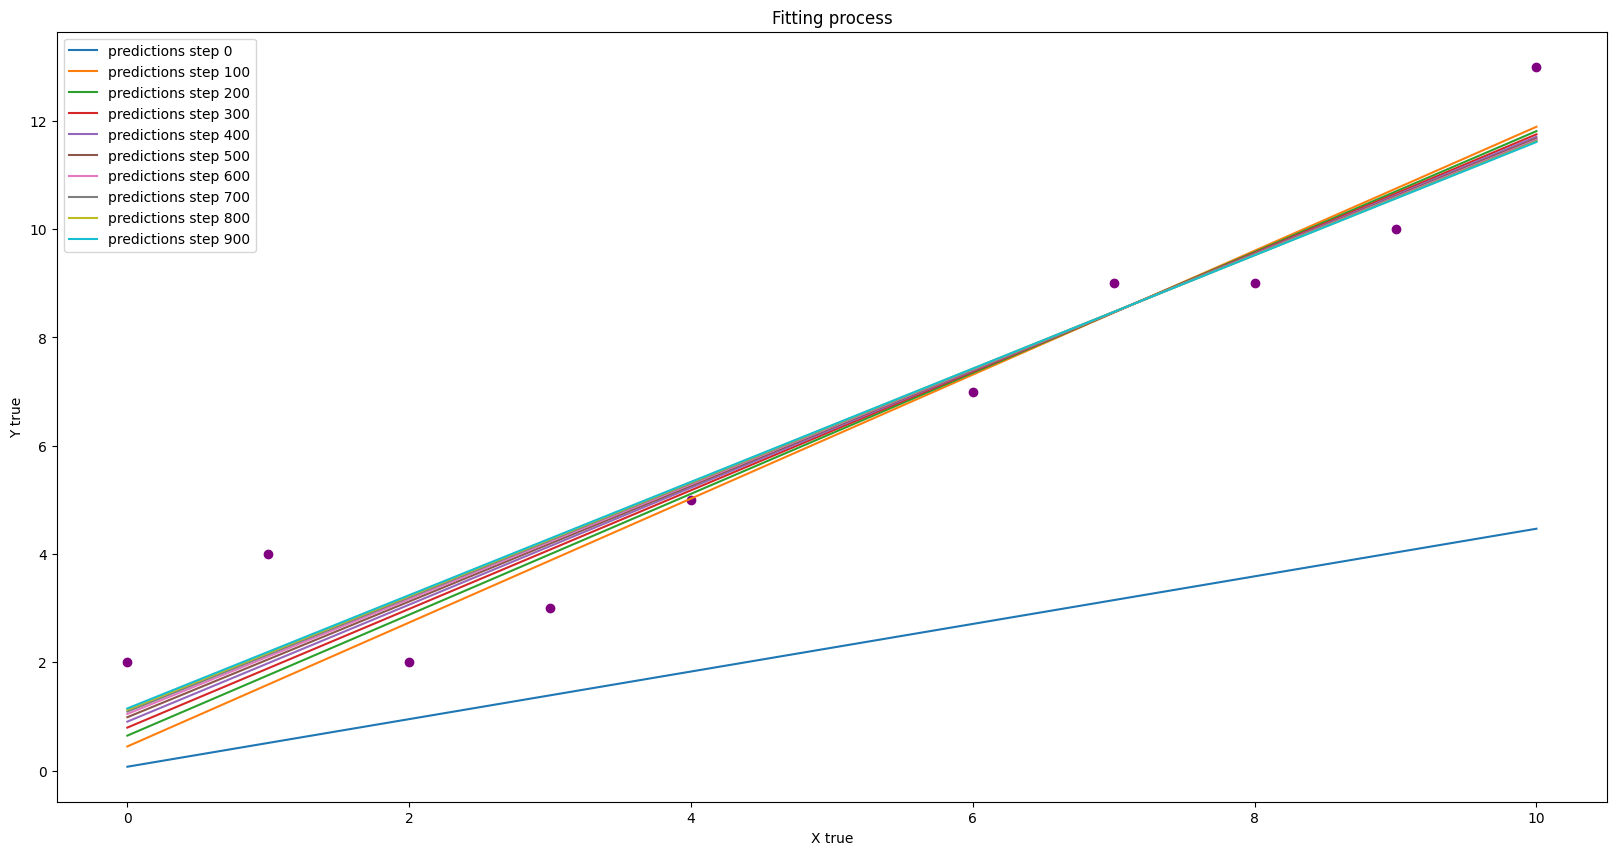

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


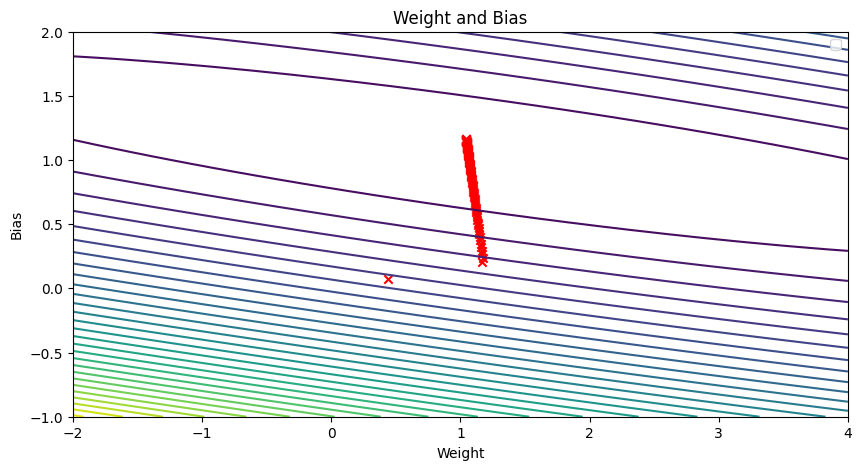

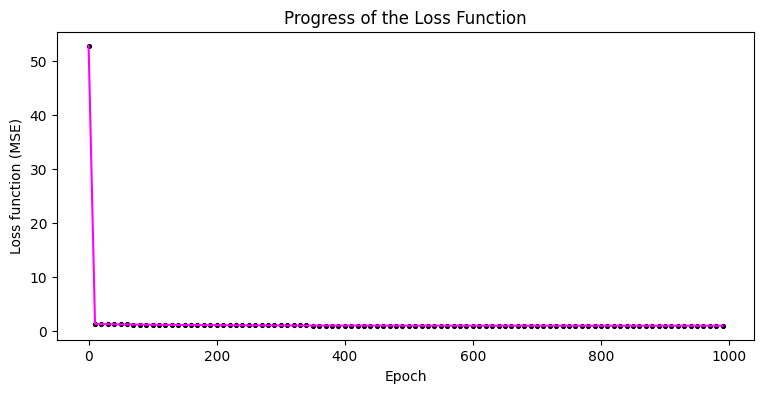

In [23]:
#Visualizar para dos parámetros
x_dos = np.array([0, 3, 2, 1, 4, 6, 7, 8, 9, 10])
y_dos = np.array([2, 3, 2, 4, 5, 7, 9, 9, 10, 13])
linreg_gradient_dos = LinearRegressor()
linreg_gradient.fit(x_dos, y_dos, "gradient_descent", iterations=1000)
